In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('USArrests.csv').copy()

In [ ]:
# usa de eyaletlerde suç oranı. Eyalet bazlı görmek için clustering yapmamız gerekmekte.

In [4]:
df.head()
#Murder cinayet
#assault saldırı
#rape saldırı tecavüz taciz

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df.index

RangeIndex(start=0, stop=50, step=1)

In [7]:
df.index = df.iloc[:,0]

In [8]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [9]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6
Colorado,Colorado,7.9,204,78,38.7
Connecticut,Connecticut,3.3,110,77,11.1
Delaware,Delaware,5.9,238,72,15.8
Florida,Florida,15.4,335,80,31.9


In [10]:
df = df.iloc[:,1:5]

In [17]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [ ]:
#gözlem yapacağımız column eyalet olduğu için eyaleti index yaptık. Ve programa bunlar gözlem birimlerinin bilgisidir dememiz sağlandı. 

In [18]:
df.index.name = None

In [20]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [21]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>]], dtype=object)

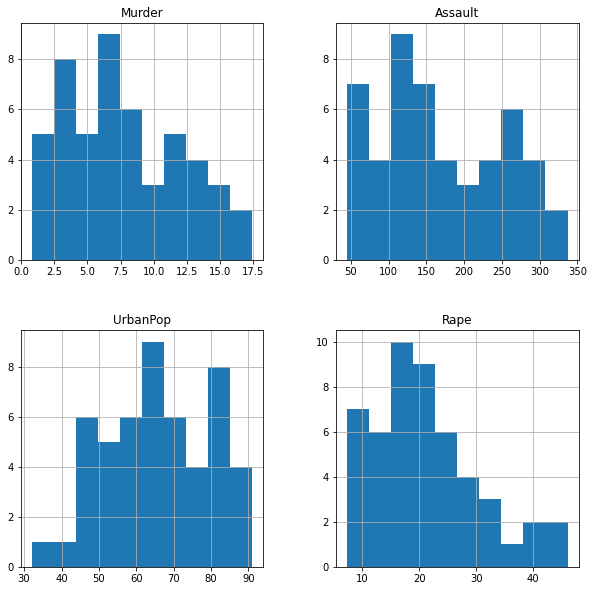

In [24]:
df.hist(figsize=(10,10))

In [25]:
kmeans = KMeans(n_clusters=4)
kmeans

KMeans(n_clusters=4)

In [26]:
?kmeans

Type:        KMeans
String form: KMeans(n_clusters=4)
File:        ~/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should take arguments X, n_clusters and a
    random state and return an initialization.

n_init : int, default=10
    Num

In [27]:
kmeans.n_clusters

4

In [28]:
k_fit = kmeans.fit(df)

In [30]:
k_fit.cluster_centers_

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [31]:
k_fit.labels_

array([1, 1, 1, 0, 1, 0, 3, 1, 1, 0, 2, 3, 1, 3, 2, 3, 3, 1, 2, 1, 0, 1,
       2, 1, 0, 3, 3, 1, 2, 0, 1, 1, 1, 2, 3, 0, 0, 3, 0, 1, 2, 0, 0, 3,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [32]:
# görselleştirme

In [56]:
kmeans2 = KMeans(n_clusters=3)
k_fit2= kmeans2.fit(df)

In [57]:
kumeler = k_fit2.labels_

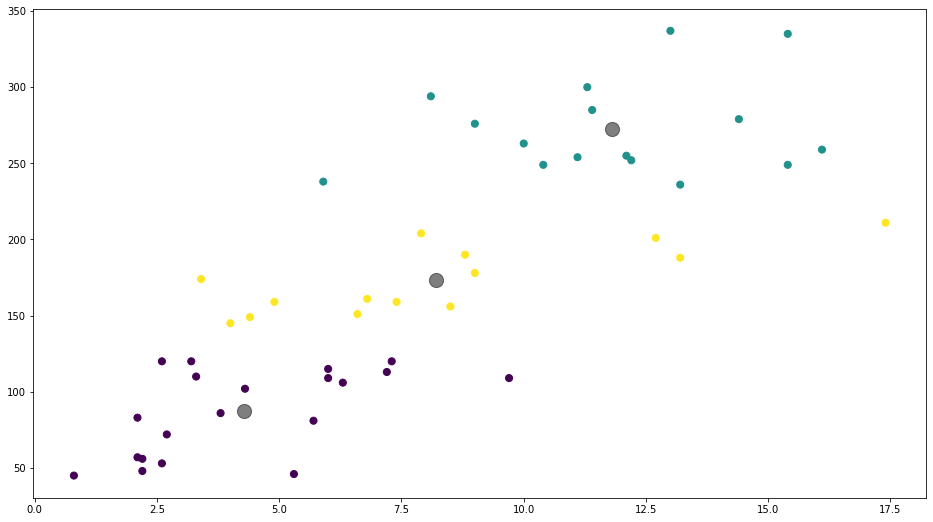

In [58]:
plt.scatter(df.iloc[:,0],df.iloc[:,1], c= kumeler , s= 50, cmap ='viridis')
merkezler = k_fit2.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c = 'black' , s = 200, alpha=0.5)

In [59]:
from mpl_toolkits.mplot3d import Axes3D

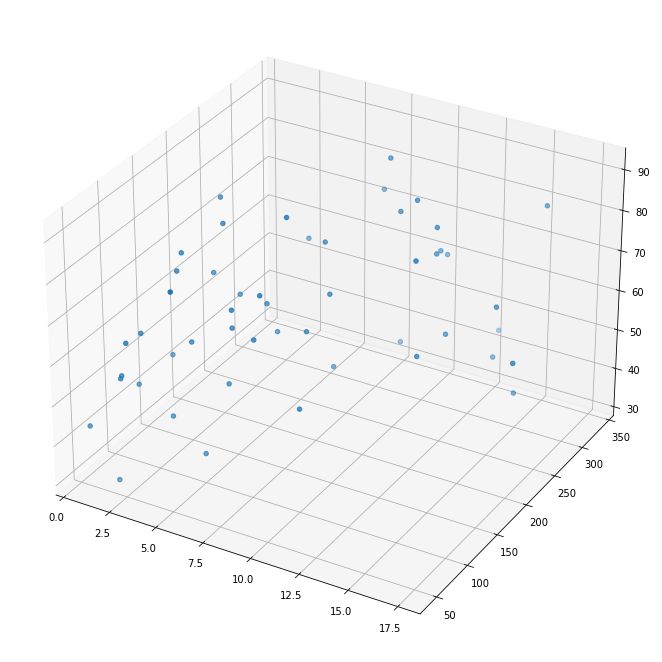

In [60]:
plt.rcParams['figure.figsize'] = (16,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1], df.iloc[:,2])

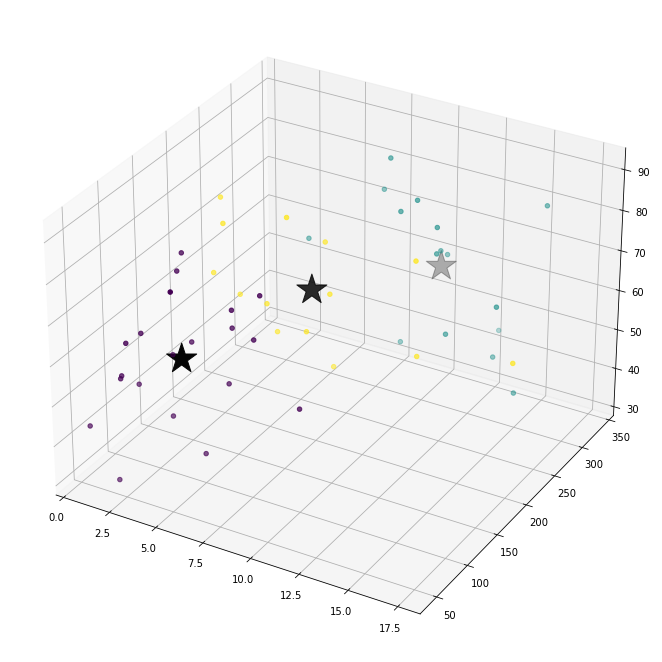

In [61]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2], c = kumeler)
ax.scatter(merkezler[:,0], merkezler[:,1], merkezler[:,2],marker = "*", c= '#050505', s=1000)

In [ ]:
# kümeler ve gözlem birimleri

In [50]:
kmeans3 = KMeans(n_clusters = 3)
k_fit3 = kmeans3.fit(df)
kumeler = k_fit3.labels_

In [51]:
pd.DataFrame({'Eyaletler': df.index, 'Kumeler': kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,2


In [52]:
df['kume_no'] = kumeler

In [53]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


In [54]:
df['kume_no'] = df['kume_no'] + 1

In [55]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,1


## Model Tuning Optimum Küme Sayısının Belirlenmesi

In [62]:
!pip install yellowbrick

     |████████████████████████████████| 271 kB 2.5 MB/s eta 0:00:01


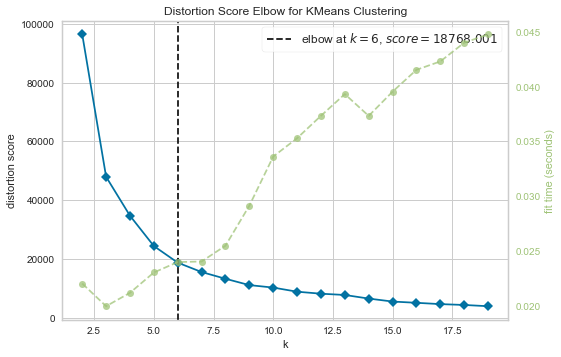

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k =(2,20))
visualizer.fit(df)
visualizer.poof()

### Hiyerarşik Kümeleme